In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
# load the data
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


数据中显示了，标签，仓等级，姓名，性别，年龄，姐妹，父母，旅费，特征信息。其中：
- "Siblings/Spouses Aboard" 指的是船舶或飞机上有多少兄弟姐妹或配偶一同旅行。
- "Parents/Children Aboard" 指的是船舶或飞机上有多少父母或孩子一同旅行。

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
# analysis
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [12]:
# remove the name column from the dataframe
df = df.drop('Name', axis=1)

# transform the sex column into a binary variable
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# transform the Pclass column into dummy variable and concatenating to the Dataframe
pclass_dummies = pd.get_dummies(
    df['Pclass'],
    prefix = 'Pclass', 
    drop_first = True
)

df = pd.concat([df, pclass_dummies], axis = 1)
df = df.drop('Pclass', axis=1)
df.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,1,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,0,35.0,0,0,8.0500,False,True


In [6]:
pclass_dummies

,Pclass_2,Pclass_3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
882,True,False
883,False,False
884,False,True
885,False,False


在对"Pclass"列进行处理时，为什么要丢弃第一个column是因为在创建虚拟变量时，我们需要将分类变量转换为虚拟/哑变量。在这种情况下，原始的"Pclass"列有三个不同的值（1、2、3），为了避免多重共线性问题，我们只需要使用两个虚拟变量来代表三个类别。因此，我们可以通过丢弃第一个虚拟变量的方式来避免多重共线性，因为可以通过剩余的两个虚拟变量来完整地表示所有的分类信息。

例如，如果原始的"Pclass"列是1、2、3，则丢弃第一个虚拟变量后，我们得到的两个虚拟变量分别可以表示"Pclass"为2和3的情况，而当"Pclass"为1时，两个虚拟变量都是0。这样就可以避免多重共线性，保证了模型的有效性。

因此，在上述代码中，设置了"drop_first=True"参数，以便在创建虚拟变量时丢弃第一个column，从而处理了多重共线性问题。


多重共线性是指在回归分析中，自变量之间存在高度相关性或线性相关性，从而导致模型估计不准确或不稳定的情况。在逻辑回归模型中，多重共线性会对模型的解释能力和预测性能产生负面影响。

在创建虚拟变量时，如果不删除一个项，可能会导致多重共线性的问题。这是因为当一个类别特征被编码成多个虚拟变量时，它们之间会存在线性相关性。例如，假设原始的"Pclass"列有三个类别（1、2、3），如果不删除一个项，而是将其全部转换为虚拟变量，会得到三个虚拟变量。这三个虚拟变量之间存在如下关系：

- 如果"Pclass"为1，则"Pclass_2"和"Pclass_3"都是0；
- 如果"Pclass"为2，则"Pclass_1"和"Pclass_3"都是0；
- 如果"Pclass"为3，则"Pclass_1"和"Pclass_2"都是0。

因此，存在一个线性关系，例如，如果知道"Pclass_1"和"Pclass_2"，就可以通过"Pclass_3 = 1 - Pclass_1 - Pclass_2"来确定"Pclass_3"。这种线性关系会导致多重共线性问题。

多重共线性会对模型参数的估计产生不良影响，使得参数的标准误差增大，导致参数估计的不稳定性，甚至可能使得参数估计失效。因此，在创建虚拟变量时，为了避免多重共线性问题，通常会删除一个虚拟变量，使得剩余的虚拟变量之间不存在完全的线性相关性。

In [8]:
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Sex                      887 non-null    int64  
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Pclass_2                 887 non-null    bool   
 7   Pclass_3                 887 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.4 KB


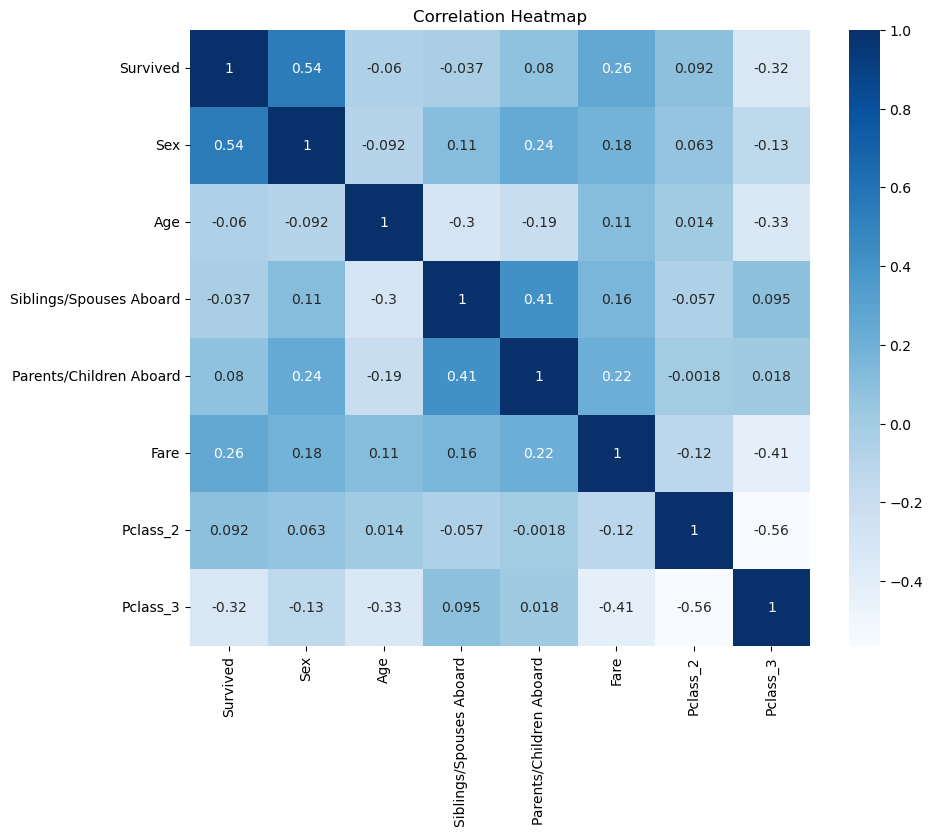

In [9]:
# importing seaborn for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix for continuous variables
correlation_matrix = df.corr()

# plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# remove outliers from data
def remove_outliers_using_std(df, threshold=3):
    for column in df.columns:
        # skip binary variables
        if len(df[column].unique()) > 2:
            mean = df[column].mean()
            std = df[column].std()
            # define bounds for the acceptable range
            lower_bound = mean - threshold * std
            upper_bound = mean + threshold * std
            # filter the values based on the standard deviation range for each column
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# adapt the function to df
df = remove_outliers_using_std(df, threshold=3)
df.head()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,1,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,False
4,0,0,35.0,0,0,8.0500,False,True


In [17]:
df['Pclass_2'] = df['Pclass_2'].astype(int)
df['Pclass_3'] = df['Pclass_3'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 821 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 821 non-null    int64  
 1   Sex                      821 non-null    int64  
 2   Age                      821 non-null    float64
 3   Siblings/Spouses Aboard  821 non-null    int64  
 4   Parents/Children Aboard  821 non-null    int64  
 5   Fare                     821 non-null    float64
 6   Pclass_2                 821 non-null    int64  
 7   Pclass_3                 821 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 57.7 KB


In [19]:
# summaries statistic
df.describe()

,Survived,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Pclass_2,Pclass_3
count,821.000000,821.000000,821.00000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,0.389769,0.342266,29.88084,0.349574,0.255786,25.968244,0.221681,0.540804
std,0.487995,0.474757,13.66483,0.619473,0.565561,29.843263,0.415631,0.498636
min,0.000000,0.000000,0.42000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,21.00000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,0.000000,28.00000,0.000000,0.000000,13.000000,0.000000,1.000000
75%,1.000000,1.000000,38.00000,1.000000,0.000000,27.720800,0.000000,1.000000
max,1.000000,1.000000,71.00000,3.000000,2.000000,164.866700,1.000000,1.000000


In [20]:
# Logistic Regression
# define the target variable y and features X
y = df['Survived']
X = df.drop('Survived', axis=1)

# add a constant (intercept) to the features
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [21]:
# create and fit the logistic regression model
model = sm.Logit(y_train, X_train).fit()
# print the summary of the logistic regression model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.450654
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  656
Model:                          Logit   Df Residuals:                      648
Method:                           MLE   Df Model:                            7
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.3269
Time:                        14:09:45   Log-Likelihood:                -295.63
converged:                       True   LL-Null:                       -439.21
Covariance Type:            nonrobust   LLR p-value:                 3.318e-58
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.9880      0.551      1.792      0.073      -0.092   

In [22]:
# predict the probabilities of the test set
y_pred_prob = model.predict(X_test)

# threshold the predicted probalibilies to create binary predictions
y_pred = [1 if p > 0.5 else 0 for p in y_pred_prob]

In [32]:
# a function for interpret the model
def interpret_logistic_regression(model):
    """
    Interprets the coefficients of a logistic regression model fitted using statsmodels.
    The interpretation is provided in terms of the percentage increase in odds for the event to happen.
    The function automatically detects binary variables and provides information about statistical significance.

    Parameters:
    model: statsmodels.discrete.discrete_model.LogitResultsWrapper
           the fitted logistic regression model.

    Example usage:
        import statsmodels.api as sm
        X = sm.add_constant(data[['feature1', 'feature2']])
        y = data['binary_outcome']
        model = sm.Logit(y, X).fit()
        interpret_logistic_regression(model)
    """
    variables = model.model.exog_names[1:] # exclude the constant
    params = model.params[1:] # exclude the constant
    pvalues = model.pvalues[1:] # exclude the constant

    # identify binary variables by checking if the min and max of the exogenous variable are 0 and 1
    binary_vars = [var for var, values in zip(variables, model.model.exog[:, 1:].T) if min(values) == 0 and max(values) == 1]

    for variable, coef, pvalue in zip(variables, params, pvalues):
        print('-' * 50)

        # calculate percentage increase in odds
        percentage_increase = (np.exp(coef) - 1) * 100

        if variable in binary_vars:
            print(f"For the binary variable '{variable}':")
            print(f"  - If this variable changes from 0 to 1, the odds of the event happening increase by {percentage_increase:.2f}%.")
        else:
            print(f"For the continuous variable '{variable}':")
            print(f"  - A unit increase in this variable increases the odds of the event happening by {percentage_increase:.2f}%.")

        # Check for statistical significance
        if pvalue < 0.05:
            print("  - This variable is statistically significant at the 0.05 level.")
        else:
            print("  - This variable is not statistically significant at the 0.05 level.")

    print('-' * 50)

In [33]:
# function that computes the 4 KPIs for classification
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

def evaluate_classification_model(y_true, y_pred):
    """
    Evaluates a classification model by computing the accuracy, F1-score, sensitivity, and specificity.

    Parameters:
    y_true : array-like
        True labels of the samples.
    y_pred : array-like
        Predicted labels of the samples.

    Example usage:
        y_true = [1, 0, 1, 1, 0]
        y_pred = [1, 0, 0, 1, 1]
        evaluate_classification_model(y_true, y_pred)
    """

    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:")
    print("  - Measures the proportion of correctly classified instances out of the total instances.")
    print(f"  - Result: {accuracy:.2f}\n")

    # F1-Score
    f1 = f1_score(y_true, y_pred)
    print("F1-Score:")
    print("  - Harmonic mean of precision and recall, balances both false positives and false negatives.")
    print(f"  - Result: {f1:.2f}\n")

    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)
    print("Sensitivity (Recall):")
    print("  - Measures the proportion of actual positives that are correctly identified as such.")
    print(f"  - Result: {sensitivity:.2f}\n")

    # Specificity
    specificity = tn / (tn + fp)
    print("Specificity:")
    print("  - Measures the proportion of actual negatives that are correctly identified as such.")
    print(f"  - Result: {specificity:.2f}\n")   

In [34]:
# apply function to read coefficients
interpret_logistic_regression(model)

--------------------------------------------------
For the binary variable 'Sex':
  - If this variable changes from 0 to 1, the odds of the event happening increase by 1296.02%.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the continuous variable 'Age':
  - A unit increase in this variable increases the odds of the event happening by -4.73%.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the continuous variable 'Siblings/Spouses Aboard':
  - A unit increase in this variable increases the odds of the event happening by -37.65%.
  - This variable is statistically significant at the 0.05 level.
--------------------------------------------------
For the continuous variable 'Parents/Children Aboard':
  - A unit increase in this variable increases the odds of the event happening by -10.03%.
  - This variable is not statistically significant at 

In [35]:
# assess model
print(f'The mean of the y_test is {y_test.mean()}')
evaluate_classification_model(y_test, y_pred)

The mean of the y_test is 0.38181818181818183
Accuracy:
  - Measures the proportion of correctly classified instances out of the total instances.
  - Result: 0.79

F1-Score:
  - Harmonic mean of precision and recall, balances both false positives and false negatives.
  - Result: 0.72

Sensitivity (Recall):
  - Measures the proportion of actual positives that are correctly identified as such.
  - Result: 0.68

Specificity:
  - Measures the proportion of actual negatives that are correctly identified as such.
  - Result: 0.86

